Sentiment Distribution:
Sentiment
Positive               44
Joy                    42
Excitement             32
Happy                  14
Neutral                14
                       ..
Vibrancy                1
Culinary Adventure      1
Mesmerizing             1
Thrilling Journey       1
Winter Magic            1
Name: count, Length: 279, dtype: int64


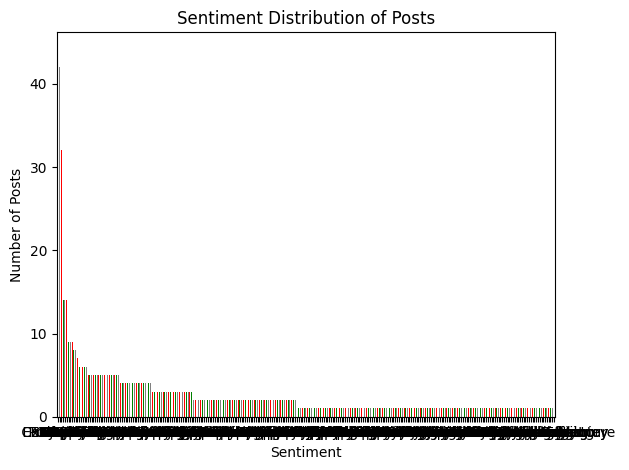

In [57]:
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv('sentimentdataset.csv')  


# Check sentiment distribution
sentiment_counts = df['Sentiment'].value_counts()

# Print results
print("Sentiment Distribution:")
print(sentiment_counts)

# Plotting
sentiment_counts.plot(kind='bar', color=['green', 'gray', 'red'])
plt.title("Sentiment Distribution of Posts")
plt.xlabel("Sentiment")
plt.ylabel("Number of Posts")
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()


Platform Usage:
Platform
Instagram     258
Facebook      231
Twitter       128
Twitter       115
Name: count, dtype: int64


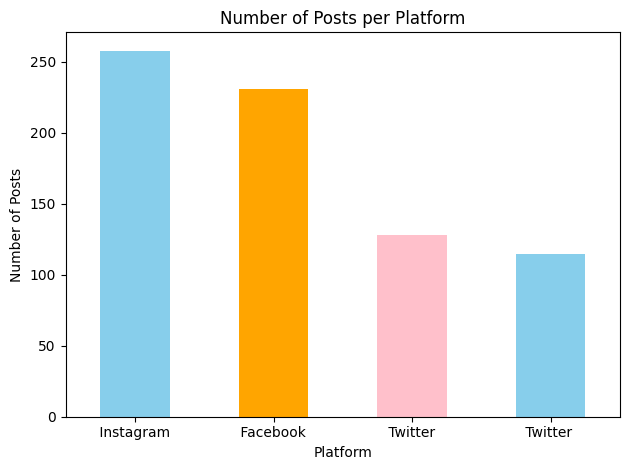

In [58]:
# Count the number of posts per platform
platform_counts = df['Platform'].value_counts()

# Print results
print("Platform Usage:")
print(platform_counts)

# Plotting
platform_counts.plot(kind='bar', color=['skyblue', 'orange', 'pink'])
plt.title("Number of Posts per Platform")
plt.xlabel("Platform")
plt.ylabel("Number of Posts")
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()


Top 10 Hashtags:
          Hashtag  Count
173     #Serenity     15
10     #Gratitude     13
131   #Excitement     13
220      #Despair     11
267    #Nostalgia     11
172  #Contentment     10
258    #Curiosity     10
224   #Loneliness      9
314      #Hopeful      9
114          #Awe      9


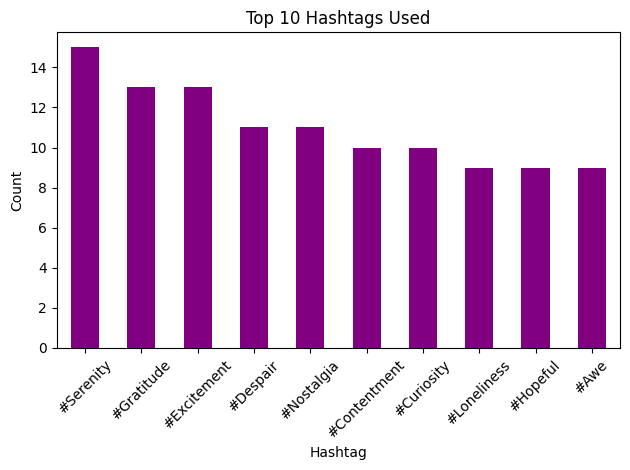

In [59]:
from collections import Counter
import itertools

# Drop missing values in Hashtags column and split each cell into list of hashtags
all_hashtags = df['Hashtags'].dropna().apply(lambda x: x.split())

# Flatten the list of lists into a single list
flat_hashtags = list(itertools.chain.from_iterable(all_hashtags))

# Count occurrences
hashtag_counts = Counter(flat_hashtags)

# Convert to DataFrame for easy visualization
hashtag_df = pd.DataFrame(hashtag_counts.items(), columns=['Hashtag', 'Count']).sort_values(by='Count', ascending=False)

# Display top 10 hashtags
print("Top 10 Hashtags:")
print(hashtag_df.head(10))

# Plotting
hashtag_df.head(10).plot(x='Hashtag', y='Count', kind='bar', color='purple', legend=False)
plt.title("Top 10 Hashtags Used")
plt.xlabel("Hashtag")
plt.ylabel("Count")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


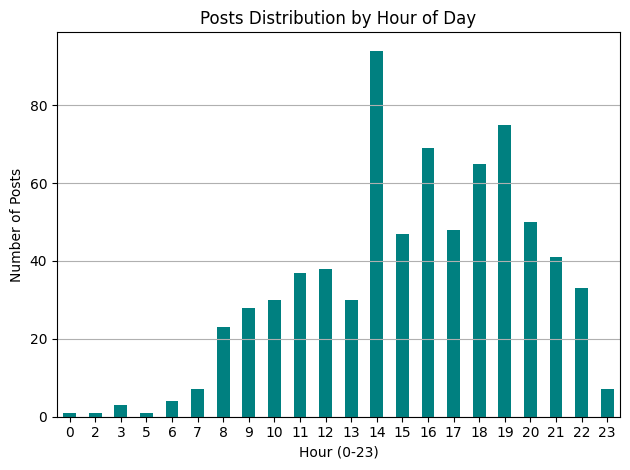

In [60]:
# Count number of posts per hour
hourly_posts = df['Hour'].value_counts().sort_index()

# Plotting
hourly_posts.plot(kind='bar', color='teal')
plt.title("Posts Distribution by Hour of Day")
plt.xlabel("Hour (0-23)")
plt.ylabel("Number of Posts")
plt.xticks(rotation=0)
plt.grid(axis='y')
plt.tight_layout()
plt.show()


In [61]:
sentiment_counts = df['Sentiment'].value_counts()


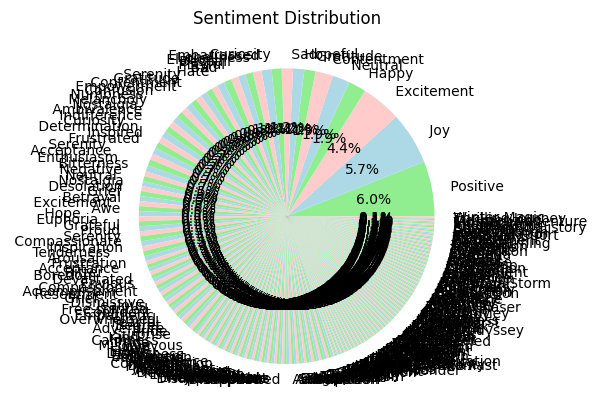

In [62]:
sentiment_counts.plot(kind='pie', autopct='%1.1f%%', colors=['#90ee90', '#add8e6', '#ffcccb'])
plt.title('Sentiment Distribution')
plt.ylabel('')
plt.show()

In [63]:
engagement_by_platform = df.groupby('Platform')[['Likes', 'Retweets']].mean()


In [64]:
active_hours = df['Hour'].value_counts().sort_index()


Heatmap: Posts by Hour/Day

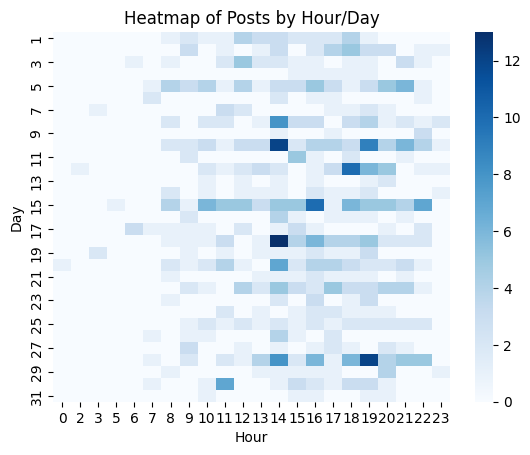

In [56]:
import seaborn as sns
import pandas as pd
heatmap_data = df.groupby(['Day', 'Hour']).size().unstack(fill_value=0)
sns.heatmap(heatmap_data, cmap='Blues')
plt.title('Heatmap of Posts by Hour/Day')
plt.xlabel('Hour')
plt.ylabel('Day')
plt.show()


🔝 Most Popular Hashtags

In [65]:
from collections import Counter

# Split hashtags
df['Hashtags'] = df['Hashtags'].fillna('').apply(lambda x: [tag.strip() for tag in x.split('#') if tag.strip()])
all_hashtags = [tag for tags in df['Hashtags'] for tag in tags]
hashtag_counts = Counter(all_hashtags).most_common()


In [66]:
top_by_likes = df.sort_values(by='Likes', ascending=False).head(5)
top_by_retweets = df.sort_values(by='Retweets', ascending=False).head(5)


In [67]:
country_distribution = df['Country'].value_counts()


📈 Line Chart of Daily Likes/Retweets


C:\Users\anshu\AppData\Local\Temp\ipykernel_11104\99676052.py:1: UserWarning: Parsing dates in %Y-%m-%d %H:%M:%S format when dayfirst=True was specified. Pass `dayfirst=False` or specify a format to silence this warning.
  df['Date'] = pd.to_datetime(df['Timestamp'], dayfirst=True)


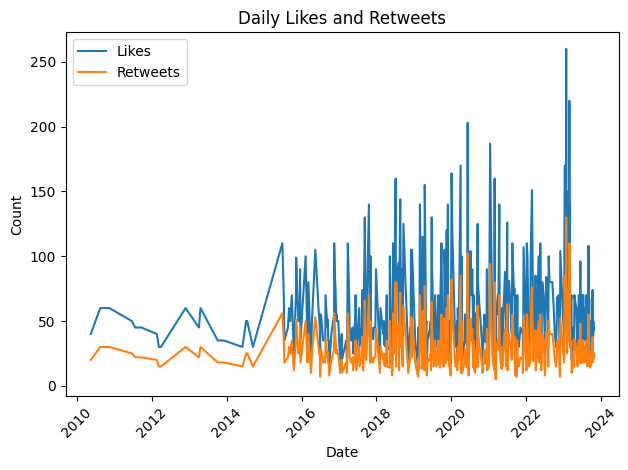

In [68]:
df['Date'] = pd.to_datetime(df['Timestamp'], dayfirst=True)
daily_engagement = df.groupby(df['Date'].dt.date)[['Likes', 'Retweets']].sum()

daily_engagement.plot(kind='line')
plt.title('Daily Likes and Retweets')
plt.xlabel('Date')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


☁️ Word Cloud of Hashtags

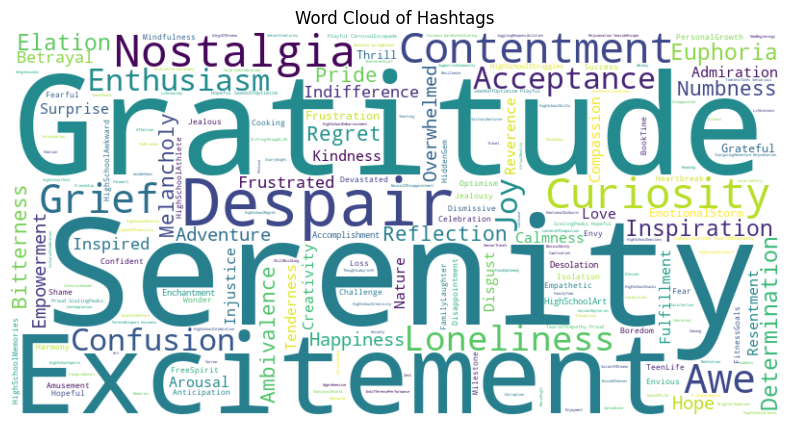

In [70]:
from wordcloud import WordCloud

hashtag_text = ' '.join(all_hashtags)
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(hashtag_text)

plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud of Hashtags')
plt.show()


Sentiment Distribution Over Time

C:\Users\anshu\AppData\Local\Temp\ipykernel_11104\458378124.py:1: UserWarning: Parsing dates in %Y-%m-%d %H:%M:%S format when dayfirst=True was specified. Pass `dayfirst=False` or specify a format to silence this warning.
  df['Date'] = pd.to_datetime(df['Timestamp'], dayfirst=True)
C:\Users\anshu\AppData\Local\Temp\ipykernel_11104\458378124.py:8: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all Axes decorations.
  plt.tight_layout()


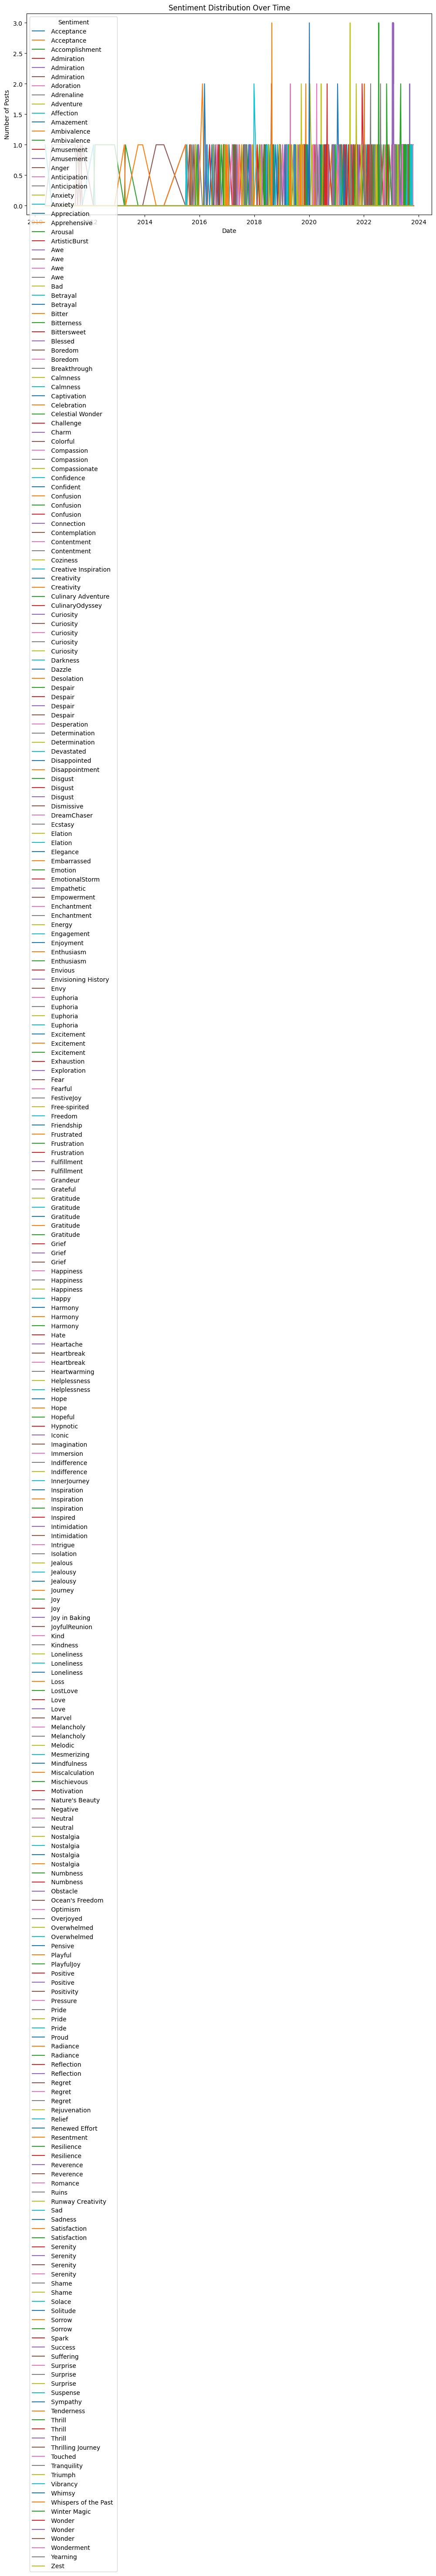

In [81]:
df['Date'] = pd.to_datetime(df['Timestamp'], dayfirst=True)
daily_sentiment = df.groupby([df['Date'].dt.date, 'Sentiment']).size().unstack(fill_value=0)
daily_sentiment.plot(kind='line', figsize=(12, 6))
plt.title("Sentiment Distribution Over Time")
plt.xlabel("Date")
plt.ylabel("Number of Posts")
plt.legend(title="Sentiment")
plt.tight_layout()
plt.show()



Engagement by Sentiment

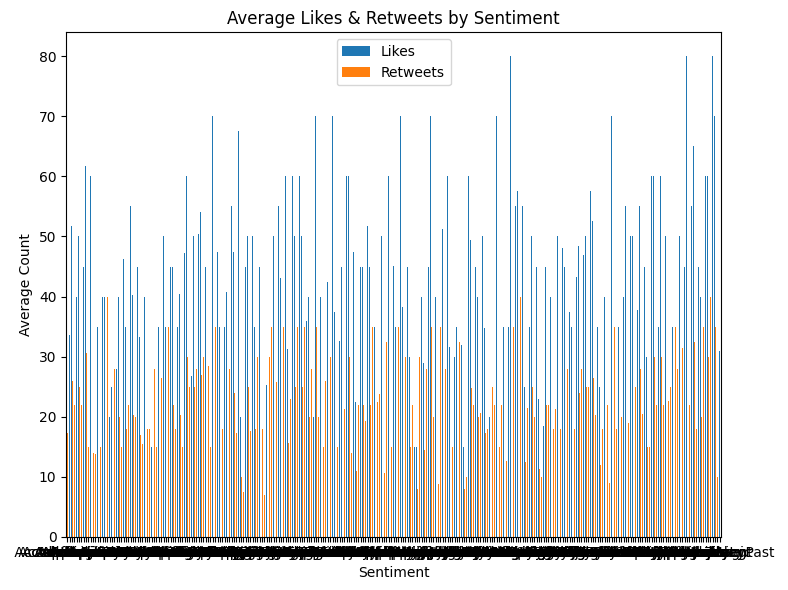

In [82]:
engagement_by_sentiment = df.groupby('Sentiment')[['Likes', 'Retweets']].mean()
engagement_by_sentiment.plot(kind='bar', figsize=(8, 6))
plt.title("Average Likes & Retweets by Sentiment")
plt.ylabel("Average Count")
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()



Platform-Sentiment Relationship

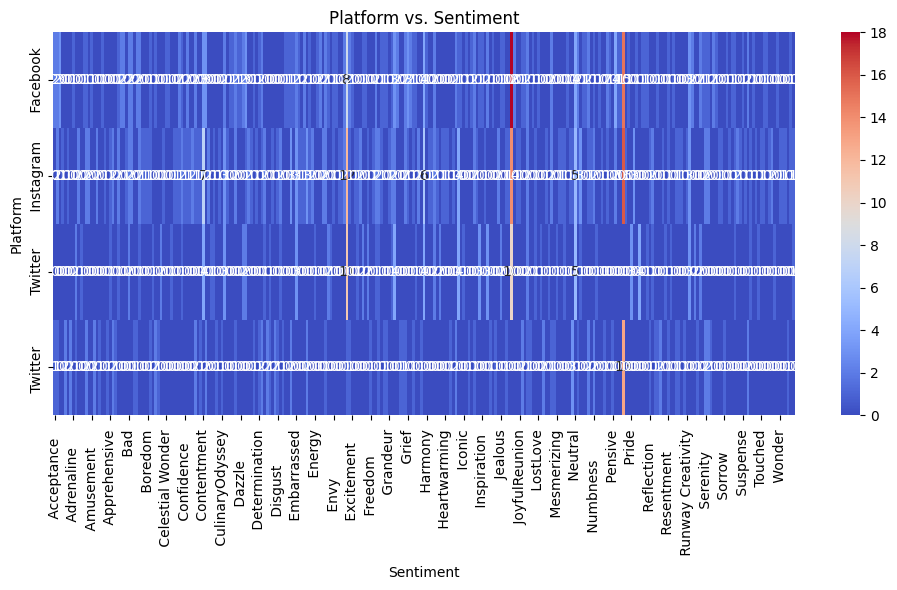

In [83]:
platform_sentiment = df.groupby(['Platform', 'Sentiment']).size().unstack(fill_value=0)

plt.figure(figsize=(10, 6))
sns.heatmap(platform_sentiment, annot=True, fmt='d', cmap='coolwarm')
plt.title("Platform vs. Sentiment")
plt.ylabel("Platform")
plt.xlabel("Sentiment")
plt.tight_layout()
plt.show()


Time of Day vs. Sentiment

C:\Users\anshu\AppData\Local\Temp\ipykernel_11104\2806118237.py:7: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all Axes decorations.
  plt.tight_layout()


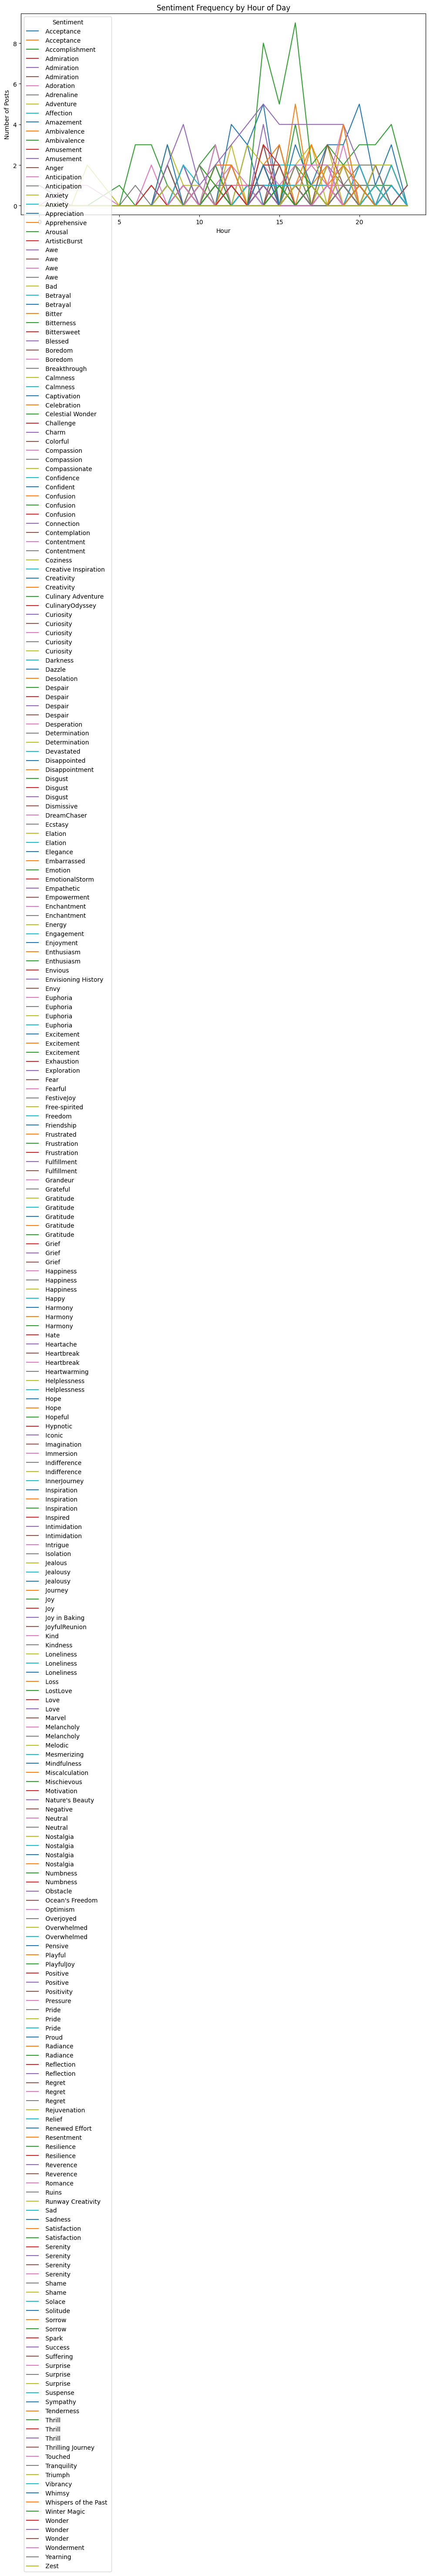

In [87]:
hourly_sentiment = df.groupby(['Hour', 'Sentiment']).size().unstack(fill_value=0)
hourly_sentiment.plot(kind='line', figsize=(12, 6))
plt.title("Sentiment Frequency by Hour of Day")
plt.xlabel("Hour")
plt.ylabel("Number of Posts")
plt.legend(title="Sentiment")
plt.tight_layout()
plt.show()

